In [ ]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

# Measures of Central Tendency

## Introduction

**Descriptive Statistics** is a branch of statistics that involves the collection, analysis, and interpretation of data to describe and summarize the characteristics of a dataset.

Descriptive statistics can be used to describe both quantitative data (e.g., numerical data) and qualitative data (e.g., categorical data). Some of the commonly used descriptive statistics measures include measures of central tendency (mean, median, mode), measures of dispersion (range, standard deviation, variance), and measures of association (correlation coefficient, covariance).

In this project, we will introduce measures of central tendency.

We need to introduce relevant concepts.

### What is a Population?

> ***In statistics, the term population (or universe) has a different and very specific meaning related to the fundamental task of statistics: the analysis of measurement data***

This definition must include an exact description of the items being measured: age, time, temperature, place, or whatever feature characterizes the items.

### What is a Parameter?

A **parameter** is a value that describes a characteristic of an entire population, such as the population means.

> ***The population means and standard deviation are two common parameters.***

> ***In statistics, Greek symbols usually represent population parameters, such as $\mu$ (mu) for the mean and 
 $\sigma$ (sigma) for the standard deviation.***

### What is a Sample?

A **sample** is a representative group drawn from the population.

### What is a statistic?

A statistic is anything that can be computed from the collected data.

> ***A statistic is any summary number, like an average or percentage, that describes the sample.***

## Measures of central tendency

There are three common ways of describing the center of a set of numbers:

- **The mean**: add up all the numbers and divide by how many numbers there are.

- **The median**: is the middle number. It is found by putting the numbers in order and taking the actual middle number if there is one, or the average of the two middle numbers if not.

- **The mode**: is the most commonly occurring number. The mode is the most commonly occurring data point in a dataset. The mode is useful when there are a lot of repeated values in a dataset. There can be no mode, one mode, or multiple modes in a dataset. We can determine the modal class (the class with the highest frequency) and then use its class mark as the approximate mode.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let’s show these by calculating the mean, median, and mode. Suppose we weight of luggage presented by airline passengers at the check-in (measured to the nearest kg):

In [7]:
# Define a list of numbers
data = [10, 12, 15, 17, 20, 20, 22, 25, 30, 35]

# Calculate the mean
mean = sum(data) / len(data)
print("Mean:", mean)

# Calculate the median
sorted_data = sorted(data)
n = len(sorted_data)
if n % 2 == 0:
    median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
else:
    median = sorted_data[n // 2]
print("Median:", median)

# Calculate the mode
c = Counter(data)
mode = c.most_common(1)[0][0]
print("Mode:", mode)

Mean: 20.6
Median: 20.0
Mode: 20


We could use numpy and scipy to compute these measures

In [8]:
import numpy as np
from scipy import stats

mean_=np.mean(data)
median_=np.median(data)
mode_=stats.mode(data)

print('mean',mean_,'median',median_,'mode',mode_)

mean 20.6 median 20.0 mode ModeResult(mode=20, count=2)


### Population ans Sample Mean

We will assume that the population is of size **N** and that associated with each member of the population is a numerical value of interest.

These numerical values will be denoted by $X_1$,...,$X_N$.

The variable $X_i$  may be a numerical variable such as age or weight, or it may take on the value 1 or 0 to denote the presence or absence of some characteristic.

We will be particularly interested in the population mean:

$$

\mu = \frac{1}{N} \sum_{i = 1}^{N} x_i = \frac{x_1 + x_2 + ... + x_n}{N}

$$

However, we are mainly concerned with analyzing data from a sample taken from a population, to make inferences about that population. Our data sets are usually random samples drawn from the population.

When we have a random sample of size $n$, we use the sample information to estimate the population means and population variance in the following way.

$$
\bar{x} = \frac{1}{n} \sum_{i = 1}^{n} x_i
$$

### Empirical Relationship between Mean, Median and Mode

There is an empirical relationship between the mean, median, and mode of a dataset, which can provide some insight into the shape of the distribution.

- **For a symmetric distribution**, the mean, median, and mode are equal. This means that the dataset has a single peak and is evenly distributed around the center.

![alt text](files\simetrica.png "T")

- For a **positively skewed distribution**, the mean is greater than the median, which is greater than the mode. This means that the dataset has a long tail on the right side, with some high values that pull the mean towards the right.

![alt text](files\positiva.png "T")

- For a **negatively skewed distribution**, the mean is less than the median, which is less than the mode. This means that the dataset has a long tail on the left side, with some low values that pull the mean towards the left.

![alt text](files\negativa.png "T")

### Choosing the "best" measure of center

The mean is ordinarily the preferred measure of central tendency. The mean is the arithmetic average of a distribution.

There are some situations in which the mean is not the "best" measure of central tendency. In certain situations, the median is the preferred measure. These situations are as follows:

- when you know that distribution is skewed
- when you believe that distribution might be skewed
- when you have a small number of subjects

The purpose of reporting the median in these situations is to combat the effect of outliers. Outliers affect the distribution because they are extreme scores.

### Practice

1. Ten patients at a doctor’s surgery wait for the following lengths of times to see their doctor. What are the mean, median, and mode for these data?

    Dataset= [5 mins, 20 mins, 28 mins, 2 mins, 5 mins,9 mins, 62 mins, 11mins, 16 mins, 5 mins]

In [13]:
dataset = [5,20,28,2,5,9,62,11,16,5]
print(f'Promedio: {np.mean(dataset)}')
print(f'Mediana: {np.median(dataset)}')
print(f'Moda: {stats.mode(dataset)}')

Promedio: 16.3
Mediana: 10.0
Moda: ModeResult(mode=5, count=3)


2. Computing the Mean for the Datasaurus Dozen Dataset

    The "Datasaurus Dozen" dataset contains 13 datasets, each with a different shape but the same summary statistics. Import the ``datasaurus.csv`` using pandas as ``df``.

    Once you have imported the dataset, you can compute the mean for each dataset.

In [14]:
df = pd.read_csv('files/datasaurus.csv')

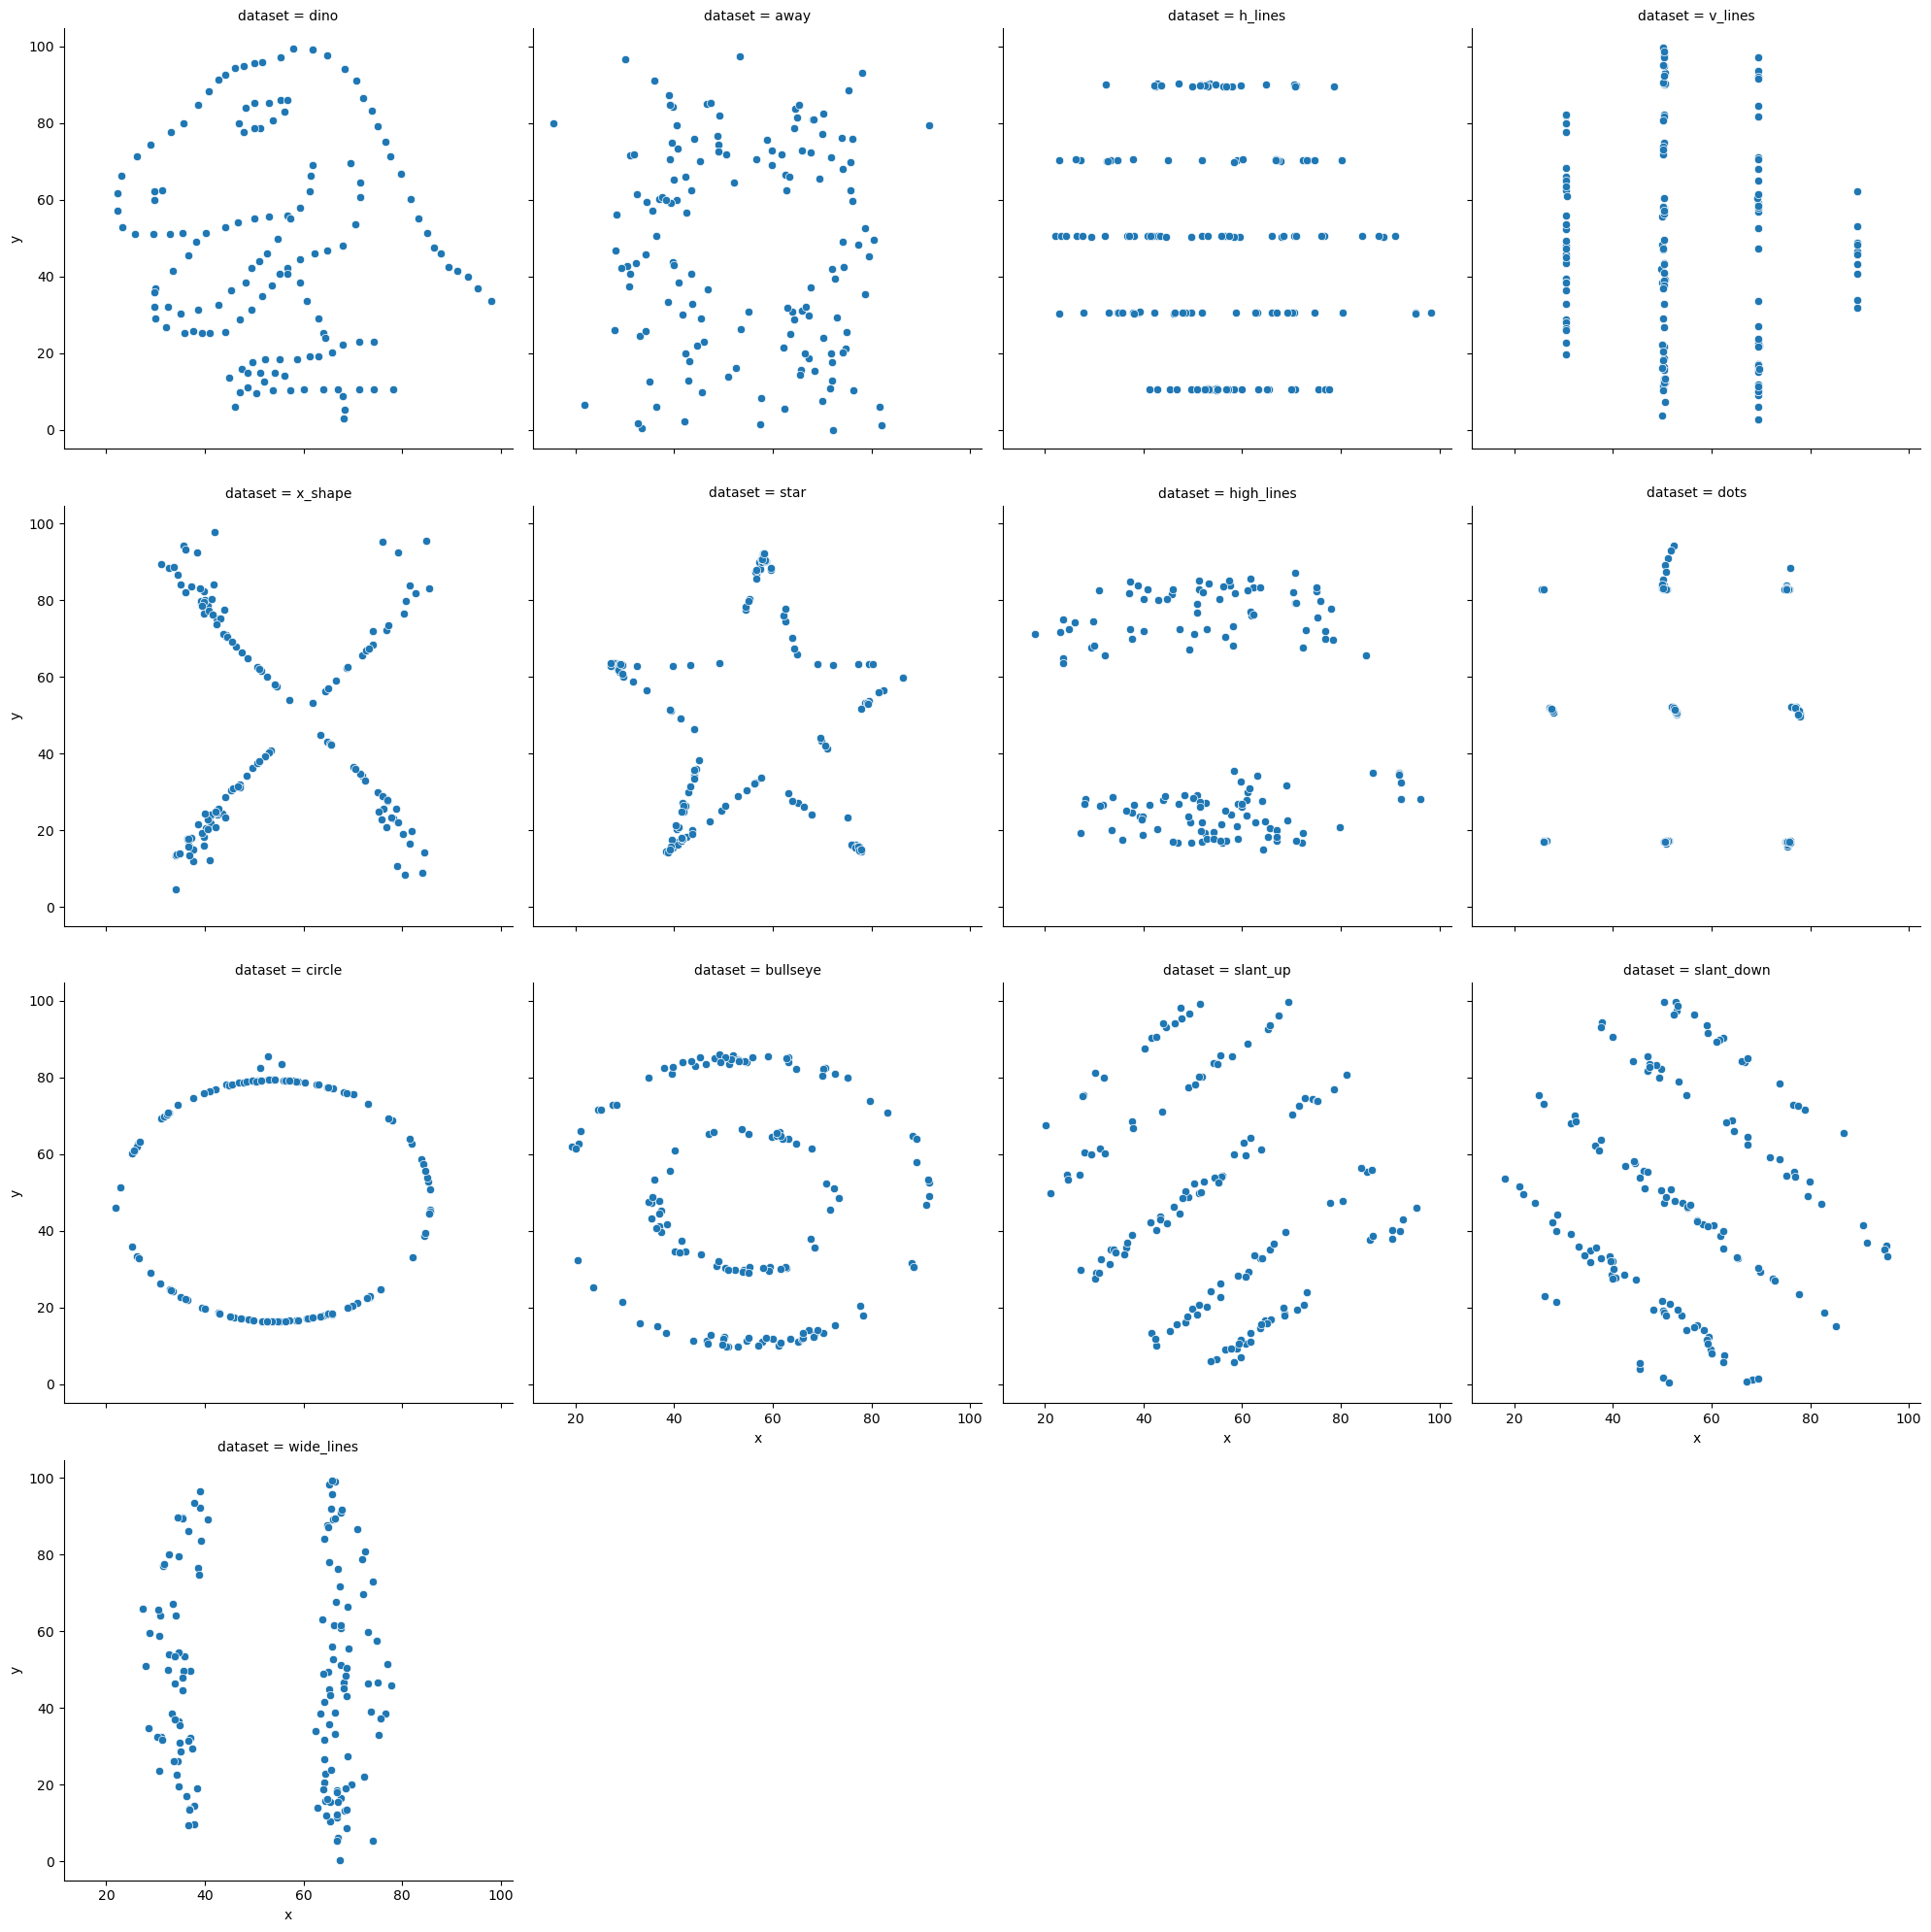

In [15]:
sns.relplot(data=df, x='x', y='y', col='dataset', col_wrap=4);

In [17]:
df['x+y'] = df['x'] + df['y']
df.groupby('dataset')['x+y'].mean()

dataset
away          102.100820
bullseye      102.099553
circle        102.105037
dino          102.095526
dots          102.100133
h_lines       102.091694
high_lines    102.104255
slant_down    102.103745
slant_up      102.097377
star          102.106886
v_lines       102.106915
wide_lines    102.098518
x_shape       102.099868
Name: x+y, dtype: float64

In [18]:
df.groupby('dataset').mean()

,x,y,x+y
dataset,,,
away,54.266100,47.834721,102.100820
bullseye,54.268730,47.830823,102.099553
circle,54.267320,47.837717,102.105037
dino,54.263273,47.832253,102.095526
dots,54.260303,47.839829,102.100133
h_lines,54.261442,47.830252,102.091694
high_lines,54.268805,47.835450,102.104255
slant_down,54.267849,47.835896,102.103745
slant_up,54.265882,47.831496,102.097377


In [19]:
# Loop through each dataset
for dataset in df['dataset'].unique():
    # Subset the dataset
    subset = df[df['dataset'] == dataset]

    # Compute the mean
    mean_x = subset['x'].mean()
    mean_y = subset['y'].mean()

    # Print the results
    print("Dataset:", dataset)
    print("Mean x:", mean_x)
    print("Mean y:", mean_y)
    print("")


Dataset: dino
Mean x: 54.26327323943662
Mean y: 47.832252816901416

Dataset: away
Mean x: 54.266099784295776
Mean y: 47.834720624943664

Dataset: h_lines
Mean x: 54.26144178316902
Mean y: 47.83025191366197

Dataset: v_lines
Mean x: 54.26992723091549
Mean y: 47.836987988408445

Dataset: x_shape
Mean x: 54.26015033415493
Mean y: 47.839717279450696

Dataset: star
Mean x: 54.26734110478873
Mean y: 47.83954522535211

Dataset: high_lines
Mean x: 54.26880527950703
Mean y: 47.83545020401409

Dataset: dots
Mean x: 54.26030345169014
Mean y: 47.839829209014084

Dataset: circle
Mean x: 54.26731970598592
Mean y: 47.83771726725352

Dataset: bullseye
Mean x: 54.268730022394365
Mean y: 47.83082315530282

Dataset: slant_up
Mean x: 54.26588178542254
Mean y: 47.831495652323945

Dataset: slant_down
Mean x: 54.26784882366197
Mean y: 47.83589633112676

Dataset: wide_lines
Mean x: 54.266916301197185
Mean y: 47.83160198797184



3. NYCflights13 data

    For this task, we will explore a real-world dataset. Load the dataset ``flights.csv`` and store it in the variable ``flights``, which contains over 300,000 observations of flights departing NYC in 2013.

    > We will focus on displaying a single variable, the arrival delay of flights in minutes

    The flight arrival delays are in minutes and negative values mean the flight was early.

    What are the mean, median, and mode for these data? Store them in ``f_mean``, ``f_median``, and ``f_mode``.

In [20]:
flights = pd.read_csv('files/flights.csv')

In [32]:
f_mean = np.mean(flights['arr_delay'])
f_median = np.median(flights['arr_delay'])
c = Counter(flights['arr_delay'].to_list())
f_mode = c.most_common(1)[0][0]

print(f_mean)
print(f_median)
print(f_mode)

1.2971432896160044
-6.0
-13.0


In [29]:
flights['arr_delay'].to_list()

[11.0,
 20.0,
 33.0,
 -18.0,
 -25.0,
 12.0,
 19.0,
 -14.0,
 -8.0,
 8.0,
 -2.0,
 -3.0,
 7.0,
 -14.0,
 31.0,
 -4.0,
 -8.0,
 -7.0,
 12.0,
 -6.0,
 -8.0,
 16.0,
 -12.0,
 -8.0,
 -17.0,
 32.0,
 14.0,
 4.0,
 -21.0,
 -9.0,
 3.0,
 5.0,
 1.0,
 29.0,
 10.0,
 0.0,
 -3.0,
 29.0,
 14.0,
 -19.0,
 -9.0,
 12.0,
 48.0,
 -5.0,
 -10.0,
 -18.0,
 -11.0,
 -9.0,
 5.0,
 -6.0,
 -7.0,
 -6.0,
 11.0,
 -33.0,
 -9.0,
 -8.0,
 -18.0,
 4.0,
 -10.0,
 27.0,
 -23.0,
 -14.0,
 5.0,
 2.0,
 -7.0,
 1.0,
 -6.0,
 -9.0,
 -31.0,
 44.0,
 20.0,
 -15.0,
 -12.0,
 21.0,
 10.0,
 5.0,
 -4.0,
 31.0,
 -10.0,
 12.0,
 7.0,
 3.0,
 -26.0,
 -1.0,
 2.0,
 30.0,
 4.0,
 -26.0,
 -12.0,
 26.0,
 2.0,
 7.0,
 -11.0,
 3.0,
 10.0,
 -10.0,
 49.0,
 -18.0,
 -4.0,
 -4.0,
 -14.0,
 -2.0,
 33.0,
 -1.0,
 -30.0,
 8.0,
 -6.0,
 -19.0,
 -22.0,
 -12.0,
 -13.0,
 10.0,
 12.0,
 -4.0,
 0.0,
 -7.0,
 11.0,
 -28.0,
 -26.0,
 10.0,
 23.0,
 7.0,
 17.0,
 17.0,
 -16.0,
 -14.0,
 -40.0,
 24.0,
 -13.0,
 -2.0,
 -5.0,
 16.0,
 2.0,
 -7.0,
 51.0,
 -13.0,
 15.0,
 7.0,
 -8.0,
 -23.0,
 3.0,

# Mearuse of Dispersion

## Measures of Dispersion

![alt text](files\intro.png "T")

The mean is the value usually used to indicate the centre of a distribution. If we are dealing with quantity variables our description of the data will not be complete without a measure of the extent to which the observed values are spread out from the average.

We will consider several measures of **dispersion**.

During this project we will introduce this concepts and practice using real dataset.

### Measure of Dispersion

#### Range

One very simple measure of dispersion is the **range**. Range is a measure of dispersion that calculates the difference between the maximum and minimum values in a dataset.

Lets consider the two distributions given in the following Figures. They represent the marks of a group of thirty students on two tests.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


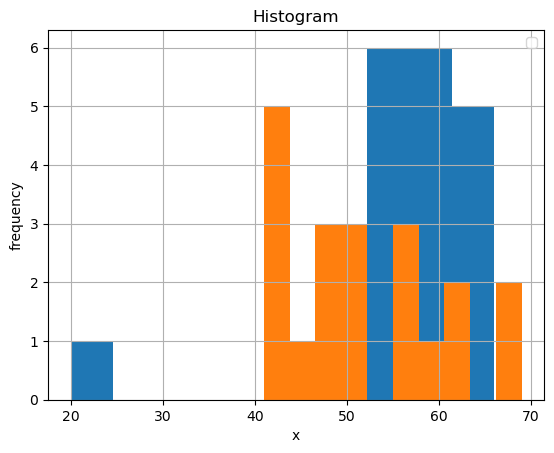

In [4]:
import numpy as np
from scipy import stats


test_a=np.random.randint(low=40, high=70, size=(20))
test_b=np.append(np.random.randint(low=50, high=70, size=(20)),20)

fig, ax = plt.subplots()

ax.hist(test_b)
ax.hist(test_a)
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Histogram')
ax.legend(loc='best', frameon=True)
ax.grid(True)

On test A, the range is $70 - 40 = 30$. **Orange**

On test B, the range is $70 - 20 = 50$ **Blue** but apart from the outliers, the distribution of marks on test B is clearly less spread out than that of A.

Range has several limitations, fo example it is sensitive to outliers, does not consider the variability between the maximum and minimum values, and may not be representative of the population if the sample size is small. Additionally, range does not provide information on the shape of the distribution and can be affected by the scale of the data, which can make it a poor measure for comparing datasets.

#### Mean Deviation

Mean deviation, also known as the average deviation, is a measure of dispersion that quantifies the average distance between each data point and the mean of the dataset.

> ***It is calculated by taking the absolute value of the difference between each data point and the mean, summing those values, and dividing by the number of data points.***

It is useful in situations where the mean is a good representative of the central tendency of the dataset, but where the researcher also wants to capture information about the spread of the data. However, mean deviation is less commonly used than other measures of dispersion, such as the standard deviation or interquartile range, because it has some mathematical properties that make it more difficult to work with.

The formula of the mean deviation is:

$$
Mean_{deviation} = \frac{\sum_{i=1}^{n}{\lvert x_i - \bar{x} \rvert}}{n}
$$

where the numerator is now the sum ofthe absolute values of the deviations, and absolute values are always positive in sign.

There is a comparable mean deviation formula for populations

$$
Mean_{deviation} = \frac{\sum_{i=1}^{N}{\lvert x_i - \mu \rvert}}{N}
$$

#### Variance

**The variance** (or mean squared deviation, or mean sum of squares) of a population is the arithmetic mean of its squared deviations from the population mean.

It is therefore defined by this definitional formula for the population variance.

$$
\sigma^{2} = \frac{\sum_{i=1}^{N}({ x_i - \mu })^2}{N}
$$

For a sample,

$$
s^{2} = \frac{\sum_{i=1}^{N}({ x_i - \bar{x} })^2}{n-1}
$$

The numerator is, as you would expect, the sample sum of square. But while the denominator of the population variance is $N$, population size , here the denominator is $n - 1$ , sample size minus one. The denominator is ``Bessel’s correction``.

Let's code a function to compute the variance:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Let's code a function to compute the variance and standard deviation:

In [5]:
def variance(data):
     # Number of observations
    n = len(data)
     # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
     # Variance
    variance = sum(deviations) / n
    return variance

#### Standard Deviation

The variance has two important limitations:

1. While the units for the variance are the original measurement units squared, an ideal measure of dispersion from the mean would have the same original units as the mean,

2. The variance is too sensitive to extreme values in the data, since it involves squared quantities.

The solution to both of these limitations is to take the positive square root of the variance. This quantity, called the **standard deviation**

The population standard deviation:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N}({ x_i - \mu })^2}{N}}
$$

For a sample,

$$
s = \sqrt{\frac{\sum_{i=1}^{N}({ x_i - \bar{x} })^2}{n-1}}
$$

Both the population and the sample standard deviations are always positive values because they are defined as the positive square roots (or principal square roots of their variances).

Let's code a function to compute the standard deviation:

**La Desviación estandar nos dice qué tan cerca estan los valores del set de datos a la media**

Por lo que es una medida de dispersión

Un valor pequeño nos puede indicar que los valores están muy cerca entre ellos a la media

In [ ]:
def stdev(data):
    var = variance(data)
    std_dev = (var)**0.5
    return std_dev

In [3]:
data=[1,10,34,5,10,6]
print('variance:',variance(data),'std:',stdev(data))

variance: 115.33333333333333 std: 10.739335795724674


To compute the variance and the standard deviation you could use numpy and pandas.

you can use the ``numpy.var()`` function to calculate the variance and the ``numpy.std()`` function to calculate the standard deviation.

you can use the ``pandas.DataFrame.var()`` function to calculate the variance and the ``pandas.DataFrame.std()`` function to calculate the standard deviation.

### Exercises

Which of the following sample has the greatest standard deviation?

In [6]:
a=[98, 104 ,100 ,101, 102]
b=[ 20, 4 ,6, 8, 10]
c=[2 ,10 ,5 ,10]
d=[1, 5, 3, 2]

In [18]:
valores = {
    'a':[98, 104 ,100 ,101, 102],
    'b':[ 20, 4 ,6, 8, 10],
    'c':[2 ,10 ,5 ,10],
    'd':[1, 5, 3, 2]
}

df = pd.DataFrame.from_dict(dict([(k, pd.Series(v)) for k,v in valores.items()]))
df.apply(np.std)

a    2.000000
b    5.571355
c    3.418699
d    1.479020
dtype: float64

2. For the following dataset determine the variance and standard deviation of the Age and Rating.

In [41]:
import pandas as pd

#Create a Dictionary of series
d = {'Name':pd.Series(['Emma','James','Ricky','Vera','Steve','Smith','Jack',
   'Eva','Chanchal','Gasper','Maria','Andrew']),
   'Age':pd.Series([19,26,25,33,30,29,23,34,40,55,25,46]),
   'Rating':pd.Series([4.29,3.24,3.98,3.56,1.20,2.66,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)

In [42]:
for column in df:
    if column == 'Name':
        pass
    else:
        print(column)
        print(f'Standard Deviation: {np.std(df[column], ddof = 1)}')
        print(f'Variance: {np.var(df[column], ddof = 1)}')
        print('')

Age
Standard Deviation: 10.405054133215815
Variance: 108.26515151515152

Rating
Standard Deviation: 0.9260113226613212
Variance: 0.8574969696969696



3. Computing the variance for the Datasaurus Dozen Dataset

    The "Datasaurus Dozen" dataset contains 13 datasets, each with a different shape but the same summary statistics. Import the datasaurus.csv using pandas as ``df``.

    Once you have imported the dataset, you can compute the variance for each dataset.

In [14]:
df = pd.read_csv('files/datasaurus.csv')

In [20]:
df.groupby('dataset')[['x','y']].apply(lambda x: x.var())

,x,y
dataset,,
away,281.227029,725.749775
bullseye,281.207393,725.533372
circle,280.898024,725.226844
dino,281.069988,725.515961
dots,281.156953,725.235215
h_lines,281.095333,725.756931
high_lines,281.122364,725.763490
slant_down,281.124206,725.553749
slant_up,281.194420,725.688605


4. Find the standard deviation of the average temperatures recorded over a five-day period last winter

    ``temperature= [18, 22, 19, 25, 12]``

In [23]:
temperature= [18, 22, 19, 25, 12]
print(f'Standard deviation {np.std(temperature)}')

Standard deviation 4.354308211415448


5. What happens to a variance or standard deviation when a constant is added? What if the variance and standard deviation is multiplied by a constant.

> Variability stays the same when a constant is added but multiplying by a constant changes the variability.

## Indian Premier League 2008-2019

During this lab, you are going to practice descriptive statistics using a real dataset.

Indian Premier League (IPL) is a Twenty cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by the Board of Control for Cricket India (BCCI) in 2008.

Summarizing the IPL dataset using descriptive statistics is a great way to gain insights into the performance of the teams and players over the years. It can also help to identify areas for improvement and guide decision-making for future IPL seasons.

### IPL

The first step is to load the IPL dataset (``'matches.csv'`` and ``'deliveries.csv'``) into your notebook. Once the dataset is loaded, explore it to gain a better understanding of its contents. Look at the variables included in the dataset, their data types, and the number of observations. Identify any missing data, outliers, or errors that may affect the analysis.

Then, use various measures of central tendency (such as mean, median, and mode) and measures of dispersion (such as range, variance, and standard deviation) to summarize the data. Calculate these measures for different variables in the dataset, such as runs, wickets, and economy rate, to gain insights into the performance of the teams and players.

Based on these analyses answer the following questions:

In [2]:
import pandas as pd

Load the IPL dataset ('matches.csv' and 'deliveries.csv') into your notebook. Once the dataset is loaded, explore it to gain a better understanding of its contents. Look at the variables included in the dataset, their data types, and the number of observations. Identify any missing data, outliers, or errors that may affect the analysis.

In [4]:
matches_df = pd.read_csv('files/matches.csv')
deliveries_df = pd.read_csv('files/deliveries.csv')

In [5]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
len(matches_df)

756

In [7]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [9]:
len(deliveries_df)

179078

In [10]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


1. Did you find any missing value in the deliveries dataset?

In [12]:
deliveries_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

> Yes, there is 95% of missing values in three variables for the deliveries dataset

2. Compute the average runs scored by each team during IPL 2008 - 2019 for the First Batting

    > *help: deliveries.inning equal to 1 to filter the first batting*

In [35]:
first_inning = deliveries_df[deliveries_df['inning'] == 1]
first_inning_batting = first_inning.groupby('batting_team')['total_runs'].sum()

#Calculo la cantidad de partidos de cada equipo usando nunique
first_inning_match = first_inning.groupby('batting_team')['match_id'].nunique()
avg_first_inning = first_inning_batting/first_inning_match
avg_first_inning

batting_team
Chennai Super Kings            166.685393
Deccan Chargers                157.325581
Delhi Capitals                 169.833333
Delhi Daredevils               157.083333
Gujarat Lions                  161.928571
Kings XI Punjab                162.076923
Kochi Tuskers Kerala           144.142857
Kolkata Knight Riders          160.783133
Mumbai Indians                 166.475248
Pune Warriors                  148.650000
Rajasthan Royals               158.582090
Rising Pune Supergiant         163.000000
Rising Pune Supergiants        160.428571
Royal Challengers Bangalore    167.694118
Sunrisers Hyderabad            164.619048
dtype: float64

3. Compute the mean, median and mode of the variable ``win_by_runs``

    ``win_by_runs`` columns represent the margin in which a team has won against the opponent if the team batting first has won. Let's exclude all instances when ``win_by_runs = 0`` and then compute the mean, median, and mode.

In [43]:
win_by_runs = matches_df[matches_df['win_by_runs']>0]

print(f"Mean: {win_by_runs['win_by_runs'].mean()}")
print(f"Median: {win_by_runs['win_by_runs'].median()}")
print(f"Mode: {win_by_runs['win_by_runs'].mode()[0]}")

Mean: 29.798219584569733
Median: 22.0
Mode: 14


4. Compute the mean and standard deviation of ``win_by_wickets``

In [45]:
win_by_wickets = matches_df[matches_df['win_by_wickets']>0]

print(f"Mean: {win_by_wickets['win_by_wickets'].mean()}")
print(f"Standard Deviation: {win_by_wickets['win_by_wickets'].std()}")

Mean: 6.238916256157635
Standard Deviation: 1.8256236026762627


### IPL

In the previous activities, we introduced the dataset and attempted to summarize it using descriptive statistics.

As part of the data analysis team, it is crucial to ask questions and find answers to them. In the following activities, we will attempt to identify some of the most important questions that will help us draw significant conclusions from our dataset. For instance, we will examine which cities host the highest number of matches.

Let's plot the number of matches played in each city. To achieve this, we must first tally the number of matches per city.

In [58]:
import seaborn as sns

Text(0.5, 1.0, 'Number of Matches Played in Each City')

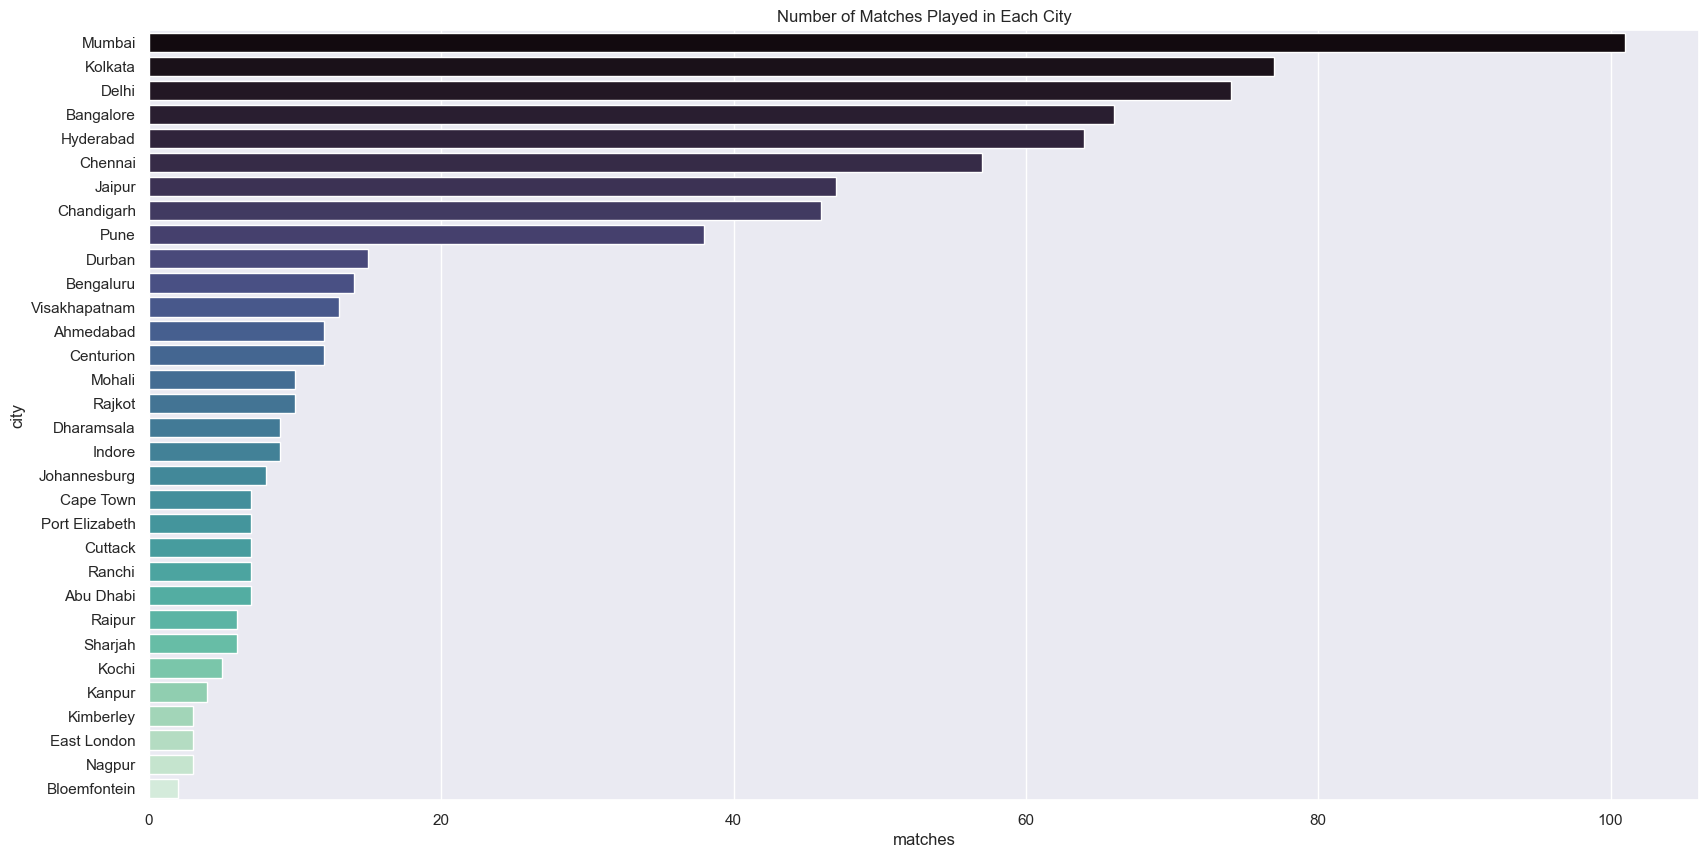

In [80]:
cities = matches_df.groupby('city')[['id']].count()
cities.rename(columns={'id': 'matches'}, inplace= True)
cities = cities.sort_values(by='matches', ascending = False).reset_index()
cities

sns.set(font_scale=0.5)
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(cities, orient = 'h', y = 'city', x = 'matches', palette = 'mako' ).set_title('Number of Matches Played in Each City')

From above bar plot it seems that Mumbai is the favourite location for IPL matches where maximum number of matches had been played followed by Bengaluru,kolkata and delhi.

Based on previous example answer the next questions:

5. Which Venue(Stadium) has hosted the most number of matches?

In [85]:
import numpy as np

Text(0.5, 1.0, 'Number of Matches in each Venue')

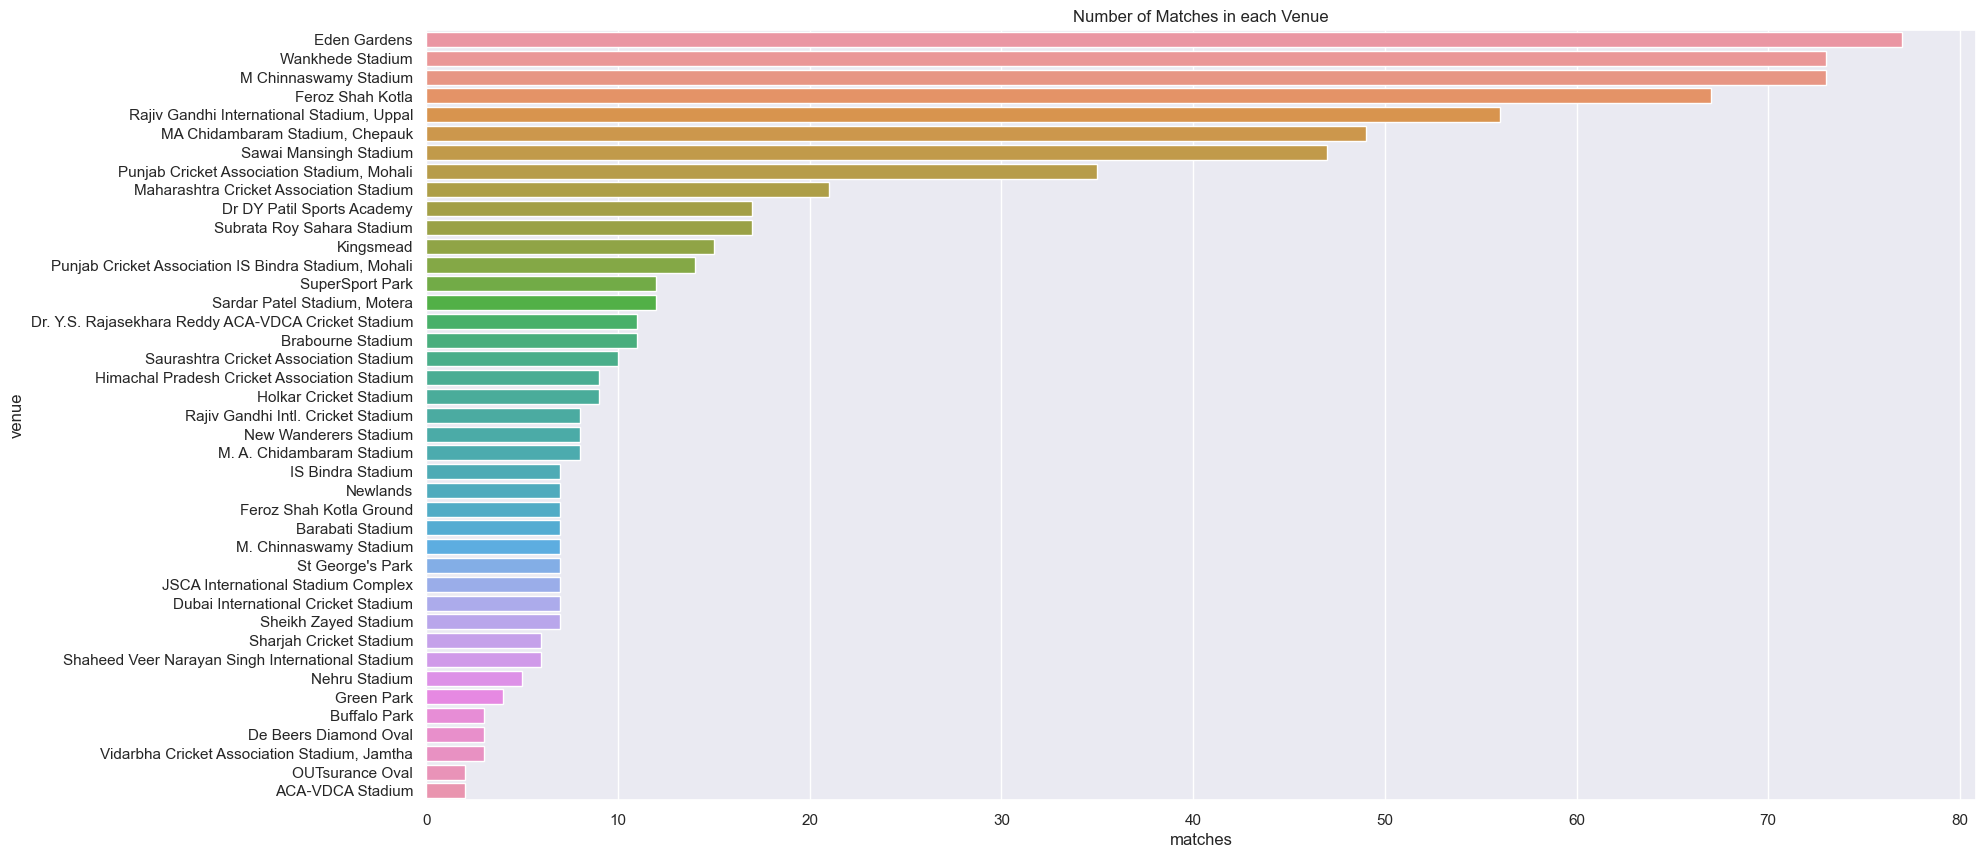

In [93]:
venues = matches_df.groupby('venue')['id'].count().reset_index(name = 'matches').sort_values(by='matches', ascending = False)
venues.index = np.arange(0, len(venues))
sns.barplot(venues, x = 'matches', y = 'venue', orient = 'h').set_title('Number of Matches in each Venue')

6. In which season most number of matches had been played ?

Text(0.5, 1.0, 'Number of Matches in each Season')

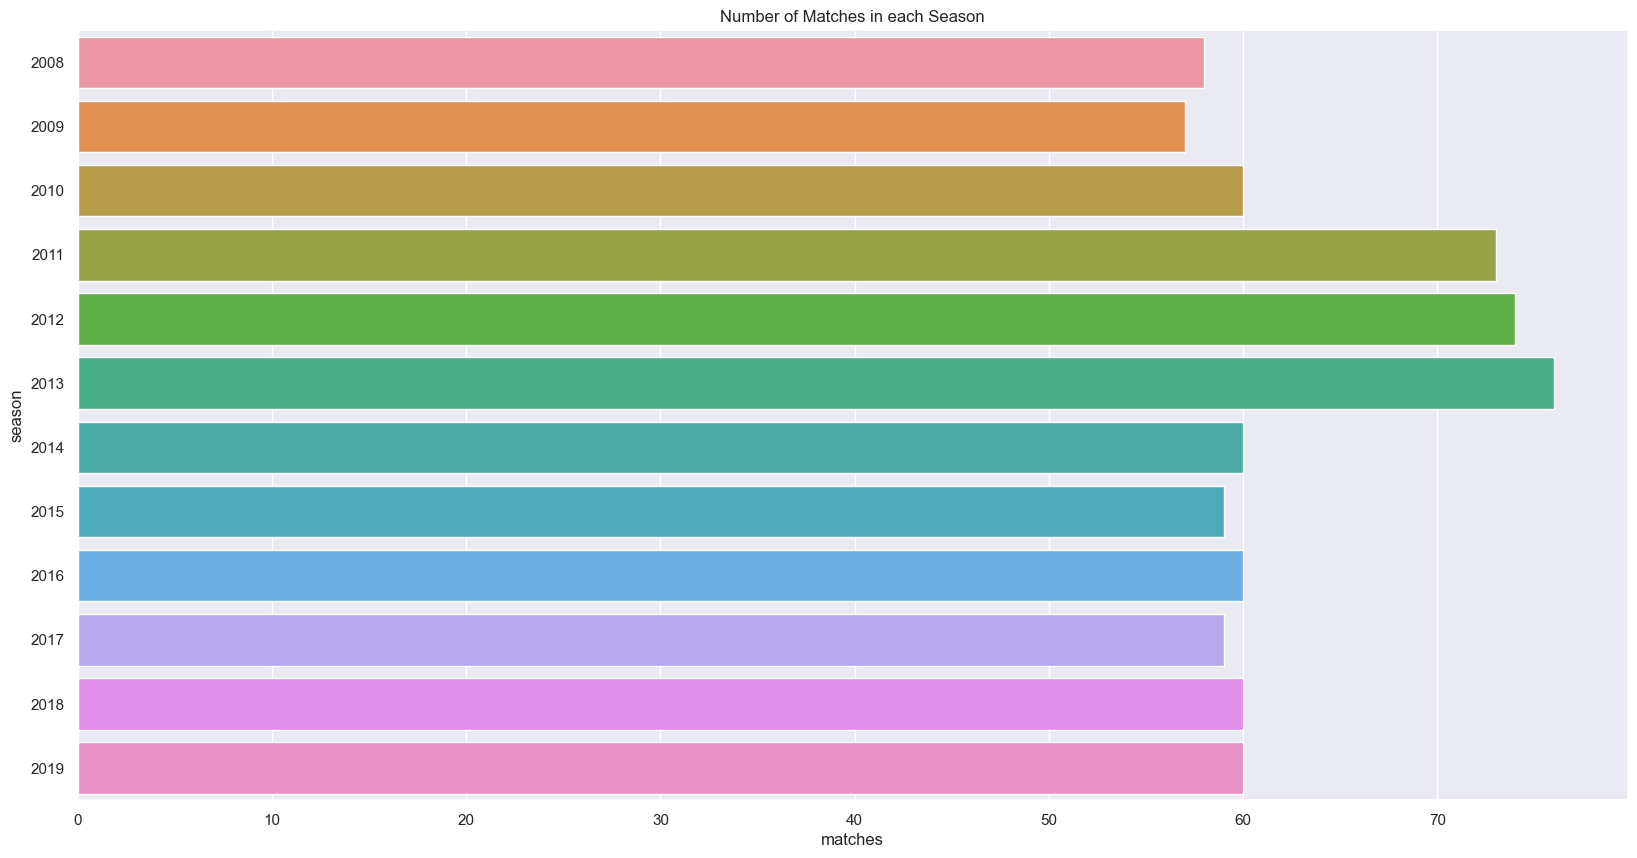

In [95]:
seasons = matches_df.groupby('season')['id'].count().reset_index(name = 'matches').sort_values(by='matches', ascending = False)
seasons.index = np.arange(0, len(seasons))
sns.barplot(seasons, x = 'matches', y = 'season', orient = 'h').set_title('Number of Matches in each Season')

# Percentiles

## Interpretations and Calculations

### Introduction

Percentiles and quantiles are statistical concepts used to divide a dataset into smaller subsets based on their relative position. They both help to understand the distribution of a dataset and identify the values that are most representative of that distribution.

During this project we will introduce these concepts with examples.

### Percentiles and Quantiles

A percentile is a measure that indicates the percentage of observations that fall below a particular value in a dataset. For example, the 75th percentile (also known as the third quartile) is the value below which 75% of the observations in the dataset fall.

Quantiles, on the other hand, are points that divide a dataset into equal portions. The most common quantiles are quartiles (which divide the dataset into four equal parts), deciles (which divide the dataset into ten equal parts), and percentiles (which divide the dataset into one hundred equal parts).

Assuming we have a vast collection of data, such as the heights of all adult males in Nevada, we can create a visual representation of this data using a graph. After some slight smoothing, the resulting graph might resemble the following figure:

Por ejemplo:

- 50% Percentil: Para calcularlo ordeno los datos y calculo la **mediana**, el valor de la mediana me indica entonces desde donde puedo ver el percentíl.

    El 50 Percentíl quedaría como 
    - Los datos son tan pequeños o más pequeños que la mediana
    - Los datos son tan grandes o más grandes que la mediana

Los cuartiles Q1 y Q3 también pueden ser vistos como percentiles

Q3 = 75 Percentíl
Q1 = 25 Percentíl

- 75% Percentíl entonces es el valor donde:
    - El 75% de los puntos de datos son igual o más pequeños que el valor percentíl
    - El 25% de los puntos de datos son igual o más grandes que el valor percentíl

Por lo que ese valor percentíl supera al 75% o pierde ante el 25% de los datos



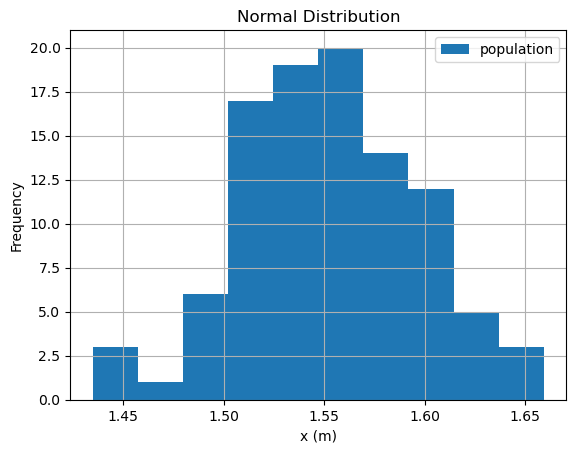

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
x=np.random.normal(1.55, 0.05,100)
fig, ax = plt.subplots()
ax.hist(x, label='population')    
ax.set_xlabel('x (m)')
ax.set_ylabel('Frequency')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.grid(True)